In [10]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import random
from sklearn import preprocessing, metrics
from joblib import load, dump
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
import pandas as pd

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
land_jitters = load('/gws/nopw/j04/aopp/jowanf/pickled/land_jittery_coefficients')
sea_jitters = load('/gws/nopw/j04/aopp/jowanf/pickled/sea_jittery_coefficients')

In [13]:
sea_jit_channel = []
land_jit_channel = []
for i in range(8):
    if i == 0:
        sea_jit_channel = [np.reshape(np.reshape(sea_jitters,(25,8,4,9,9))[:,1],-1),]
        land_jit_channel = [np.reshape(np.reshape(land_jitters,(25,8,4,9,9))[:,1],-1),]
    else:
        sea_jit_channel = np.append(sea_jit_channel,[np.reshape(np.reshape(sea_jitters,(25,8,4,9,9))[:,i],-1),],0)
        land_jit_channel = np.append(land_jit_channel,[np.reshape(np.reshape(land_jitters,(25,8,4,9,9))[:,i],-1),],0)

In [14]:
sea_land = np.append(sea_jit_channel,land_jit_channel,1)
num_pertub = np.shape(sea_jit_channel)[1]

In [15]:
sea_land_label = [['sea','land','sea','land','sea','land','sea','land','sea','land','sea','land','sea','land','sea','land'][int(np.floor(x/num_pertub))] for x in range(8*2*num_pertub)]
channel_label = [['ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7'][int(np.floor(x/(2*num_pertub)))] for x in range(8*2*num_pertub)]

In [7]:
diction = {'coefficients':np.reshape(sea_land,-1),'domain':sea_land_label,'channel':channel_label}
df = pd.DataFrame(data=diction)

In [8]:
#try and append the coefficients, channels and domains into a mega array
lined = np.reshape(sea_land,-1)
comp_array = np.append(np.append([lined,],[sea_land_label,],0),[channel_label,],0)
#find non sparse
comp_not_sparse = comp_array[:,np.where(lined!=0)]
not_sparse_dict = {'coefficients':comp_not_sparse[0,0],'domain':comp_not_sparse[1,0],'channel':comp_not_sparse[2,0]}
not_sparse_df = pd.DataFrame(data=not_sparse_dict)
not_sparse_df = not_sparse_df.astype({'coefficients': 'float64'})

<AxesSubplot:xlabel='channel', ylabel='coefficients'>

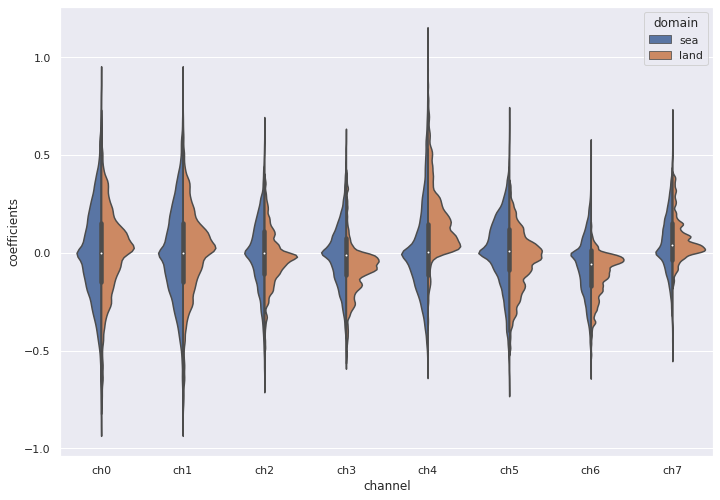

In [20]:
sns.violinplot(data=not_sparse_df,x="channel",y="coefficients",hue="domain",split=True,bw=.1)

<AxesSubplot:xlabel='channel', ylabel='coefficients'>

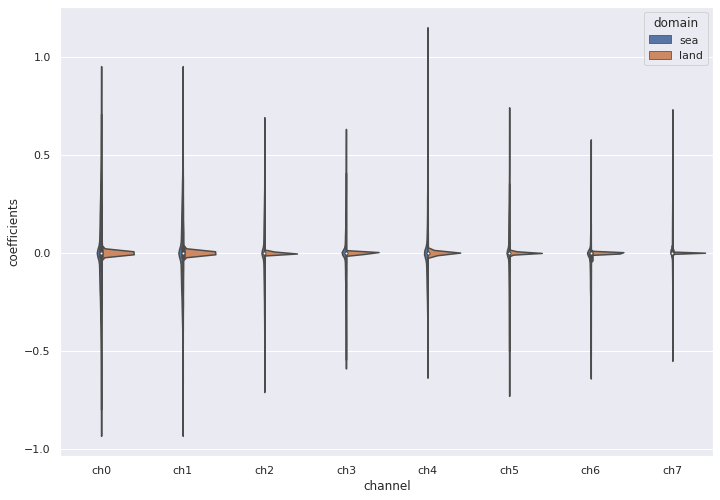

In [16]:
sns.violinplot(data=df,x="channel",y="coefficients",hue="domain",split=True,bw=.1)